<a href="https://colab.research.google.com/github/Harishh247/DSA0216-CV/blob/main/cv_activity_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

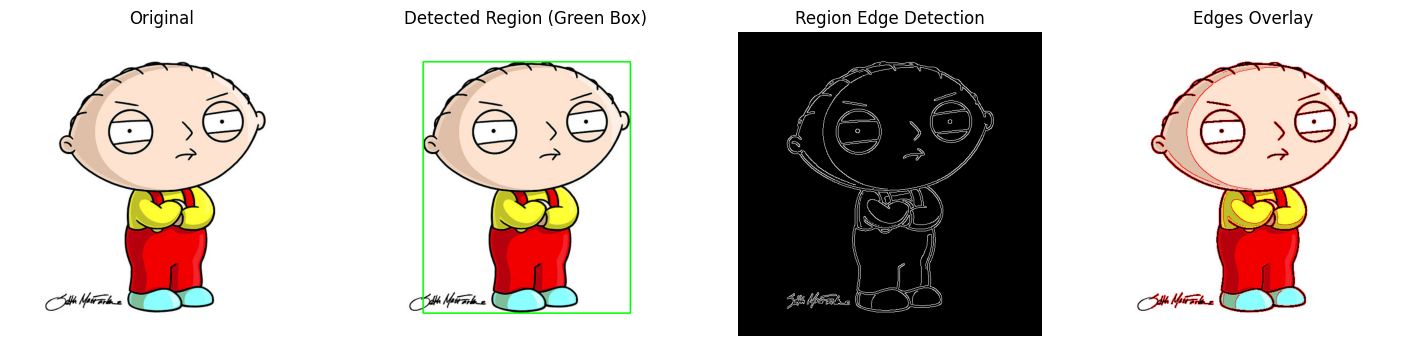

In [ ]:
# ==========================================
# AUTOMATIC REGION-BASED EDGE DETECTION
# ==========================================

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_path = "/content/h.jpg"
img = cv2.imread(image_path)

if img is None:
    raise Exception("Image not found.")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 1: Blur to remove noise
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Step 2: Edge detection on full image
edges = cv2.Canny(blur, 50, 150)

# Step 3: Find contours (detect main object)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get largest contour (main object)
largest_contour = max(contours, key=cv2.contourArea)

# Bounding box around main object
x, y, w, h = cv2.boundingRect(largest_contour)

# Draw bounding box
boxed = img_rgb.copy()
cv2.rectangle(boxed, (x,y), (x+w, y+h), (0,255,0), 2)

# Extract ROI
roi = gray[y:y+h, x:x+w]

# Apply edge detection only on ROI
roi_edges = cv2.Canny(roi, 50, 150)

# Create blank image and paste ROI edges
edges_full = np.zeros_like(gray)
edges_full[y:y+h, x:x+w] = roi_edges

# Overlay edges in red
overlay = img_rgb.copy()
overlay[edges_full != 0] = [255, 0, 0]

# Display results
plt.figure(figsize=(18,6))

plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1,4,2)
plt.title("Detected Region (Green Box)")
plt.imshow(boxed)
plt.axis("off")

plt.subplot(1,4,3)
plt.title("Region Edge Detection")
plt.imshow(edges_full, cmap='gray')
plt.axis("off")

plt.subplot(1,4,4)
plt.title("Edges Overlay")
plt.imshow(overlay)
plt.axis("off")

plt.show()